## SUPPORT VECTOR MACHINE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib

In [2]:
X, y = make_blobs(n_samples=40, n_features=2, centers=2, random_state=21,center_box=(0, 10.0))

In [3]:
X

array([[-0.12595148,  4.2647851 ],
       [ 6.02878295,  0.98081258],
       [ 6.8238175 ,  1.21706468],
       [-0.78820705,  2.95510103],
       [ 7.7698931 ,  0.78987144],
       [ 0.02323009,  3.5882732 ],
       [ 8.27788662, -0.97838087],
       [ 0.46341246,  3.84366431],
       [ 5.80507312, -1.29291985],
       [ 6.92443843, -0.82510414],
       [ 0.78393001,  3.11184998],
       [ 6.78636264,  2.06177761],
       [ 1.17917252,  2.442981  ],
       [ 7.64397136,  2.9711658 ],
       [ 0.73221275,  3.11519374],
       [-0.57460781,  1.9017282 ],
       [-0.89670806,  1.1437628 ],
       [ 0.8899726 ,  4.1355794 ],
       [ 0.28138443,  2.65652531],
       [ 6.93323582,  1.89571347],
       [ 7.62482534,  0.9638441 ],
       [ 7.07527848,  1.54080017],
       [ 2.09824078,  2.20186833],
       [ 6.76198104,  0.10007848],
       [-0.98919331,  3.12289956],
       [ 7.69003289, -1.21121511],
       [ 0.02952558,  0.90691498],
       [ 1.13140808,  3.74321929],
       [ 8.37867808,

In [4]:
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, y)

SVC(C=100, kernel='linear')

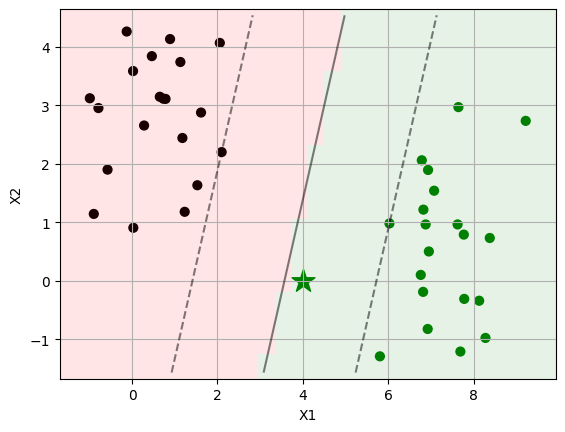

In [5]:
#Grafica:
cmap   = matplotlib.colors.ListedColormap( [ 'k', 'g' ] )
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,cmap=cmap)

#  Creamos un mesh para evaluar la función de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Graficamos el hiperplano y el margen  w.x + b = 0
# w1x1 + w2x2 + b = 0
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

# Graficamos los vectores soporte
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,facecolors='none', edgecolors='k')
Z_pred = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z_pred = Z_pred.reshape(XX.shape)

cmap   = matplotlib.colors.ListedColormap( [ 'r', 'g' ] )
plt.pcolormesh(XX, YY, Z_pred,cmap = cmap,alpha=0.1)



#New data
new_x = [[4,0]]
new_z = clf.predict(new_x)
if new_z[0]==0: color='k'
else: color='g'
plt.scatter(new_x[0][0],new_x[0][1] , marker = '*',color=color,s=300)
plt.grid()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Linearly non-separable class problem

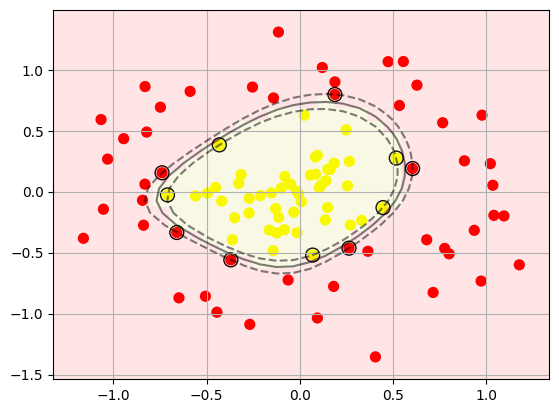

In [6]:
from sklearn.datasets import make_circles

# generamos 100 muestras con dos características, asociadas a dos clases
X, y = make_circles(100, factor=.2, noise=.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Creamos el modelo SVM para clasificación con kernel lineal/rbf y entrenamos el modelo
clf = svm.SVC(kernel='rbf', C=100).fit(X, y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Graficamos el hiperplano y el margen
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

# Graficamos los vectores soporte
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,facecolors='none', edgecolors='k')

Z_pred = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z_pred = Z_pred.reshape(XX.shape)

cmap   = matplotlib.colors.ListedColormap( [ 'r', 'y' ] )
plt.pcolormesh(XX, YY, Z_pred,cmap = cmap,alpha=0.1)

plt.grid()
plt.show()


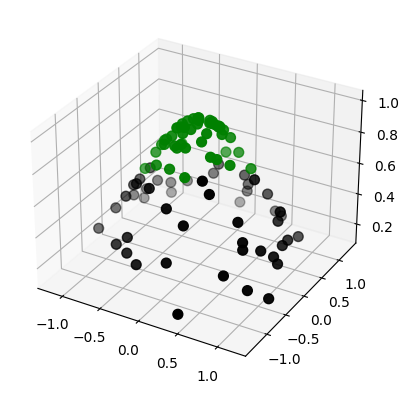

In [7]:
# Veamos el efecto del truco kernel (aumentando la dimensionalidad del espacio de entradas)
from mpl_toolkits import mplot3d

# Aplicamos una operación de kernel gaussiano para separar las clases
# Gamma controla el efecto del kernel, si es muy pequeño el modelo se parece al lineal
gamma = 1
Xr = np.exp(-gamma*(X ** 2).sum(1))

# Graficamos el espacio de características mapeado por el kernel
ax = plt.subplot(projection='3d')
cmap   = matplotlib.colors.ListedColormap( [ 'k', 'g' ] )
ax.scatter3D(X[:, 0], X[:, 1], Xr, c=y, s=50, cmap=cmap)

-Erubiel Tun Moo